  APPLYING LOGISTIC REGRESSION FOR AMAZON DATASET
  ====================================



To apply Logistic regression and do hyperparameter tunning by Grid-search and Random-search for both L1 an L2  regularization.
-----------

In [60]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plot
import pandas as pd
import numpy as np
from sklearn import linear_model, datasets
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


In [2]:
df=pd.read_csv('final_clean.csv')
df.head(2)#loading preprocessed data 

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,cleanedText
0,150524,0006641040,ACITT7DI6IDDL,shari zychinski,0,0,1,939340800,EVERY book is educational,this witty little book makes my son laugh at l...,b'witti littl book make son laugh loud recit c...
1,150506,0006641040,A2IW4PEEKO2R0U,Tracy,1,1,1,1194739200,"Love the book, miss the hard cover version","I grew up reading these Sendak books, and watc...",b'grew read sendak book watch realli rosi movi...


In [5]:

data = df.filter(['cleanedText','Text','Score'],axis=1)
data.head(2)

,cleanedText,Text,Score
0,b'witti littl book make son laugh loud recit c...,this witty little book makes my son laugh at l...,1
1,b'grew read sendak book watch realli rosi movi...,"I grew up reading these Sendak books, and watc...",1


In [7]:

from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import cross_val_score
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn import cross_validation

In [8]:
X = data['cleanedText']
y = data['Score']

SPLITTING DATA IN TO TRAIN AND TEST AND FEATURIZE TEXT UDING TF-IDF
--------------

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y)
y_train.shape
#spliting entire data into train and test

(273098,)

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer()#tfidf featurization to convert text to vectors
tfidf_train= tfidf_vect.fit_transform(x_train)
tfidf_test = tfidf_vect.transform(x_test)

OBTAINING OPTIMAL PENALITY(L1,L2) AND LAMBDA USING GRID-SEARCH CV
-------------

In [11]:
# Create regularization penalty space
penality=('l1','l2')

# Create regularization hyperparameter space
C = np.logspace(0, 4, 10)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penality)

In [13]:
logistic = linear_model.LogisticRegression()#defining our model
cf = GridSearchCV(logistic, hyperparameters, cv=5, verbose=30,n_jobs=-1)

In [14]:
from datetime import datetime
startTime = datetime.now()

#lets run GridsearchCV on our data
bestmodel=cf.fit(tfidf_train, y_train)

print(datetime.now() - startTime)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] C=1.0, penalty=l1 ...............................................
[CV] C=1.0, penalty=l1 ...............................................
[CV] C=1.0, penalty=l1 ...............................................
[CV] C=1.0, penalty=l1 ...............................................
[CV] C=1.0, penalty=l1 ...............................................
[CV] C=1.0, penalty=l2 ...............................................
[CV] C=1.0, penalty=l2 ...............................................
[CV] C=1.0, penalty=l2 ...............................................
[CV] ...... C=1.0, penalty=l2, score=0.9235627975100695, total=  16.9s
[CV] ...... C=1.0, penalty=l2, score=0.9234712559502014, total=  16.4s
[CV] C=1.0, penalty=l2 ...............................................


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   18.7s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   18.7s


[CV] C=1.0, penalty=l2 ...............................................
[CV] ...... C=1.0, penalty=l2, score=0.9229769315269132, total=  17.2s


[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:   19.2s


[CV] C=2.7825594022071245, penalty=l1 ................................
[CV] ....... C=1.0, penalty=l1, score=0.924731773408034, total=  18.0s
[CV] C=2.7825594022071245, penalty=l1 ................................


[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   19.6s


[CV] ...... C=1.0, penalty=l1, score=0.9233064811424386, total=  19.6s
[CV] C=2.7825594022071245, penalty=l1 ................................


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   20.2s


[CV] ....... C=1.0, penalty=l1, score=0.923489564262175, total=  20.6s
[CV] C=2.7825594022071245, penalty=l1 ................................


[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:   21.5s


[CV] ...... C=1.0, penalty=l1, score=0.9250823874038814, total=  20.8s
[CV] ...... C=1.0, penalty=l1, score=0.9233064811424386, total=  21.3s
[CV] C=2.7825594022071245, penalty=l1 ................................


[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:   22.0s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   22.0s


[CV] C=2.7825594022071245, penalty=l2 ................................
[CV] ...... C=1.0, penalty=l2, score=0.9234501446409609, total=  15.6s
[CV] C=2.7825594022071245, penalty=l2 ................................


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   34.8s


[CV] ...... C=1.0, penalty=l2, score=0.9242585133650677, total=  17.6s
[CV] C=2.7825594022071245, penalty=l2 ................................


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   36.4s


[CV]  C=2.7825594022071245, penalty=l2, score=0.9246429879165141, total=  20.8s
[CV] C=2.7825594022071245, penalty=l2 ................................


[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:   43.2s


[CV]  C=2.7825594022071245, penalty=l1, score=0.9237824972537532, total=  24.0s
[CV] C=2.7825594022071245, penalty=l2 ................................


[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:   43.8s


[CV]  C=2.7825594022071245, penalty=l1, score=0.9259428780666422, total=  23.7s
[CV] C=7.742636826811269, penalty=l1 .................................


[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:   45.4s


[CV]  C=2.7825594022071245, penalty=l1, score=0.9239655803734895, total=  26.5s
[CV] C=7.742636826811269, penalty=l1 .................................


[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   46.2s


[CV]  C=2.7825594022071245, penalty=l1, score=0.9245120656193929, total=  24.3s


[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:   46.7s


[CV] C=7.742636826811269, penalty=l1 .................................
[CV]  C=2.7825594022071245, penalty=l1, score=0.9249725375320396, total=  28.6s
[CV] C=7.742636826811269, penalty=l1 .................................


[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   49.0s


[CV]  C=2.7825594022071245, penalty=l2, score=0.9245331380446723, total=  20.8s
[CV] C=7.742636826811269, penalty=l1 .................................


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   55.8s


[CV]  C=2.7825594022071245, penalty=l2, score=0.9249725375320396, total=  21.2s
[CV] C=7.742636826811269, penalty=l2 .................................


[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:   57.7s


[CV]  C=2.7825594022071245, penalty=l2, score=0.9249514811966751, total=  21.9s
[CV] C=7.742636826811269, penalty=l2 .................................


[Parallel(n_jobs=-1)]: Done  19 tasks      | elapsed:  1.1min


[CV]  C=2.7825594022071245, penalty=l2, score=0.9256682533870377, total=  27.5s
[CV] C=7.742636826811269, penalty=l2 .................................


[Parallel(n_jobs=-1)]: Done  20 tasks      | elapsed:  1.2min


[CV]  C=7.742636826811269, penalty=l1, score=0.9215122665690223, total=  32.5s
[CV] C=7.742636826811269, penalty=l2 .................................


[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  1.3min


[CV]  C=7.742636826811269, penalty=l1, score=0.9213291834492859, total=  33.3s
[CV] C=7.742636826811269, penalty=l2 .................................


[Parallel(n_jobs=-1)]: Done  22 tasks      | elapsed:  1.3min


[CV]  C=7.742636826811269, penalty=l1, score=0.9213658000732332, total=  34.4s
[CV] C=21.544346900318832, penalty=l1 ................................


[Parallel(n_jobs=-1)]: Done  23 tasks      | elapsed:  1.4min


[CV]  C=7.742636826811269, penalty=l1, score=0.9222995239838887, total=  34.0s
[CV] C=21.544346900318832, penalty=l1 ................................


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.4min


[CV]  C=7.742636826811269, penalty=l2, score=0.9235261808861223, total=  28.4s
[CV] C=21.544346900318832, penalty=l1 ................................


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.4min


[CV]  C=7.742636826811269, penalty=l1, score=0.9210150499835219, total=  33.4s
[CV] C=21.544346900318832, penalty=l1 ................................


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  1.5min


[CV]  C=7.742636826811269, penalty=l2, score=0.9242218967411204, total=  31.6s
[CV] C=21.544346900318832, penalty=l1 ................................


[Parallel(n_jobs=-1)]: Done  27 tasks      | elapsed:  1.6min


[CV]  C=7.742636826811269, penalty=l2, score=0.9244049798608568, total=  30.9s
[CV] C=21.544346900318832, penalty=l2 ................................


[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  1.7min


[CV]  C=7.742636826811269, penalty=l2, score=0.9238895602182431, total=  31.7s
[CV] C=21.544346900318832, penalty=l2 ................................


[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:  1.9min


[CV]  C=7.742636826811269, penalty=l2, score=0.9257964115708531, total=  35.1s
[CV] C=21.544346900318832, penalty=l2 ................................


[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:  1.9min


[CV]  C=21.544346900318832, penalty=l1, score=0.9166239472720615, total=  40.1s
[CV] C=21.544346900318832, penalty=l2 ................................


[Parallel(n_jobs=-1)]: Done  31 tasks      | elapsed:  2.0min


[CV]  C=21.544346900318832, penalty=l1, score=0.9167704137678506, total=  39.1s
[CV] C=21.544346900318832, penalty=l2 ................................


[Parallel(n_jobs=-1)]: Done  32 tasks      | elapsed:  2.0min


[CV]  C=21.544346900318832, penalty=l1, score=0.9156719150494325, total=  36.8s
[CV] C=59.94842503189409, penalty=l1 .................................


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.1min


[CV]  C=21.544346900318832, penalty=l1, score=0.9152325155620652, total=  40.4s
[CV] C=59.94842503189409, penalty=l1 .................................


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.1min


[CV]  C=21.544346900318832, penalty=l1, score=0.9166025852283131, total=  36.8s
[CV] C=59.94842503189409, penalty=l1 .................................


[Parallel(n_jobs=-1)]: Done  35 tasks      | elapsed:  2.2min


[CV]  C=21.544346900318832, penalty=l2, score=0.9221164408641523, total=  41.8s
[CV] C=59.94842503189409, penalty=l1 .................................


[Parallel(n_jobs=-1)]: Done  36 tasks      | elapsed:  2.6min


[CV]  C=21.544346900318832, penalty=l2, score=0.9219150494324423, total=  52.3s
[CV] C=59.94842503189409, penalty=l1 .................................


[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.6min


[CV]  C=21.544346900318832, penalty=l2, score=0.9223727572317832, total=  47.1s
[CV] C=59.94842503189409, penalty=l2 .................................


[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:  2.7min


[CV]  C=21.544346900318832, penalty=l2, score=0.9233247894544123, total=  43.0s
[CV] C=59.94842503189409, penalty=l2 .................................


[Parallel(n_jobs=-1)]: Done  39 tasks      | elapsed:  2.8min


[CV]  C=21.544346900318832, penalty=l2, score=0.9220952799443407, total=  48.5s
[CV] C=59.94842503189409, penalty=l2 .................................


[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:  2.9min


[CV]  C=59.94842503189409, penalty=l1, score=0.9113694617356279, total=  45.2s
[CV] C=59.94842503189409, penalty=l2 .................................


[Parallel(n_jobs=-1)]: Done  41 tasks      | elapsed:  2.9min


[CV]  C=59.94842503189409, penalty=l1, score=0.9107469791285243, total=  46.6s
[CV] C=59.94842503189409, penalty=l2 .................................


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.9min


[CV]  C=59.94842503189409, penalty=l1, score=0.9101428048333944, total=  46.1s
[CV] C=166.81005372000593, penalty=l1 ................................


[Parallel(n_jobs=-1)]: Done  43 tasks      | elapsed:  3.0min


[CV]  C=59.94842503189409, penalty=l1, score=0.9100695715854998, total=  42.0s
[CV] C=166.81005372000593, penalty=l1 ................................


[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:  3.3min


[CV]  C=59.94842503189409, penalty=l1, score=0.9107437108645502, total=  42.6s
[CV] C=166.81005372000593, penalty=l1 ................................


[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:  3.3min


[CV]  C=166.81005372000593, penalty=l1, score=0.9074880995972171, total=  41.0s
[CV] C=166.81005372000593, penalty=l1 ................................


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  3.7min


[CV]  C=59.94842503189409, penalty=l2, score=0.9194983522519223, total=  54.5s
[CV] C=166.81005372000593, penalty=l1 ................................


[Parallel(n_jobs=-1)]: Done  47 tasks      | elapsed:  3.8min


[CV]  C=59.94842503189409, penalty=l2, score=0.9196082021237642, total= 1.1min
[CV] C=166.81005372000593, penalty=l2 ................................


[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:  3.8min


[CV]  C=59.94842503189409, penalty=l2, score=0.9193885023800805, total= 1.2min
[CV] C=166.81005372000593, penalty=l2 ................................
[CV]  C=59.94842503189409, penalty=l2, score=0.9191658427624593, total=  58.0s


[Parallel(n_jobs=-1)]: Done  49 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:  3.9min


[CV] C=166.81005372000593, penalty=l2 ................................
[CV]  C=166.81005372000593, penalty=l1, score=0.9062614426949835, total=  42.0s
[CV] C=166.81005372000593, penalty=l2 ................................


[Parallel(n_jobs=-1)]: Done  51 tasks      | elapsed:  4.0min


[CV]  C=59.94842503189409, penalty=l2, score=0.9183998535335042, total= 1.1min
[CV] C=166.81005372000593, penalty=l2 ................................


[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:  4.0min


[CV]  C=166.81005372000593, penalty=l1, score=0.9056389600878799, total=  48.5s
[CV] C=464.15888336127773, penalty=l1 ................................


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:  4.1min


[CV]  C=166.81005372000593, penalty=l1, score=0.905584035151959, total=  48.8s
[CV] C=464.15888336127773, penalty=l1 ................................


[Parallel(n_jobs=-1)]: Done  54 tasks      | elapsed:  4.5min


[CV]  C=166.81005372000593, penalty=l1, score=0.9062946281445677, total=  45.9s
[CV] C=464.15888336127773, penalty=l1 ................................


[Parallel(n_jobs=-1)]: Done  55 tasks      | elapsed:  4.5min


[CV]  C=464.15888336127773, penalty=l1, score=0.9035518125228854, total=  54.0s
[CV] C=464.15888336127773, penalty=l1 ................................


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  5.0min


[CV]  C=166.81005372000593, penalty=l2, score=0.9146283412669352, total= 1.3min
[CV] C=464.15888336127773, penalty=l1 ................................


[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:  5.2min


[CV]  C=464.15888336127773, penalty=l1, score=0.9034785792749909, total=  43.7s
[CV] C=464.15888336127773, penalty=l2 ................................


[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:  5.3min


[CV]  C=464.15888336127773, penalty=l1, score=0.9020139143171, total=  46.3s
[CV] C=464.15888336127773, penalty=l2 ................................


[Parallel(n_jobs=-1)]: Done  59 tasks      | elapsed:  5.3min


[CV]  C=166.81005372000593, penalty=l2, score=0.9150677407543024, total= 1.4min
[CV] C=464.15888336127773, penalty=l2 ................................


[Parallel(n_jobs=-1)]: Done  60 tasks      | elapsed:  5.3min


[CV]  C=166.81005372000593, penalty=l2, score=0.9158733064811424, total= 1.6min
[CV] C=464.15888336127773, penalty=l2 ................................


[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:  5.5min


[CV]  C=166.81005372000593, penalty=l2, score=0.916093006224826, total= 1.6min
[CV] C=464.15888336127773, penalty=l2 ................................


[Parallel(n_jobs=-1)]: Done  62 tasks      | elapsed:  5.5min


[CV]  C=464.15888336127773, penalty=l1, score=0.9020505309410473, total=  43.5s
[CV] C=1291.5496650148827, penalty=l1 ................................


[Parallel(n_jobs=-1)]: Done  63 tasks      | elapsed:  5.7min


[CV]  C=166.81005372000593, penalty=l2, score=0.9154491193379471, total= 1.9min
[CV] C=1291.5496650148827, penalty=l1 ................................


[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  5.9min


[CV]  C=464.15888336127773, penalty=l1, score=0.9031088652092717, total=  52.9s
[CV] C=1291.5496650148827, penalty=l1 ................................


[Parallel(n_jobs=-1)]: Done  65 tasks      | elapsed:  6.1min


[CV]  C=1291.5496650148827, penalty=l1, score=0.9017026730135481, total=  53.1s
[CV] C=1291.5496650148827, penalty=l1 ................................


[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:  6.6min


[CV]  C=1291.5496650148827, penalty=l1, score=0.9020505309410473, total=  53.4s
[CV] C=1291.5496650148827, penalty=l1 ................................


[Parallel(n_jobs=-1)]: Done  67 tasks      | elapsed:  6.8min


[CV]  C=1291.5496650148827, penalty=l1, score=0.8997803002563164, total=  57.5s
[CV] C=1291.5496650148827, penalty=l2 ................................


[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  7.1min


[CV]  C=464.15888336127773, penalty=l2, score=0.9098315635298425, total= 1.9min
[CV] C=1291.5496650148827, penalty=l2 ................................


[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:  7.3min


[CV]  C=464.15888336127773, penalty=l2, score=0.9122482607103625, total= 2.1min
[CV] C=1291.5496650148827, penalty=l2 ................................


[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:  7.4min


[CV]  C=1291.5496650148827, penalty=l1, score=0.9003295496155255, total=  55.0s
[CV] C=1291.5496650148827, penalty=l2 ................................


[Parallel(n_jobs=-1)]: Done  71 tasks      | elapsed:  7.5min


[CV]  C=1291.5496650148827, penalty=l1, score=0.9008385513933136, total=  50.4s
[CV] C=1291.5496650148827, penalty=l2 ................................


[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:  7.6min


[CV]  C=464.15888336127773, penalty=l2, score=0.9108718737412574, total= 2.4min
[CV] C=3593.813663804626, penalty=l1 .................................


[Parallel(n_jobs=-1)]: Done  73 tasks      | elapsed:  7.9min


[CV]  C=3593.813663804626, penalty=l1, score=0.9000366166239473, total=  51.1s
[CV] C=3593.813663804626, penalty=l1 .................................


[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:  8.8min


[CV]  C=3593.813663804626, penalty=l1, score=0.9001281581838154, total= 1.0min
[CV] C=3593.813663804626, penalty=l1 .................................


[Parallel(n_jobs=-1)]: Done  75 tasks      | elapsed:  9.8min


[CV]  C=464.15888336127773, penalty=l2, score=0.9122299523983889, total= 4.7min
[CV] C=3593.813663804626, penalty=l1 .................................


[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed: 10.0min


[CV]  C=464.15888336127773, penalty=l2, score=0.9104906627608934, total= 4.7min
[CV] C=3593.813663804626, penalty=l1 .................................


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed: 10.2min


[CV]  C=3593.813663804626, penalty=l1, score=0.8979128524350055, total=  52.5s
[CV] C=3593.813663804626, penalty=l2 .................................


[Parallel(n_jobs=-1)]: Done  78 tasks      | elapsed: 10.7min


[CV]  C=3593.813663804626, penalty=l1, score=0.8992859758330282, total=  52.6s
[CV] C=3593.813663804626, penalty=l2 .................................


[Parallel(n_jobs=-1)]: Done  79 tasks      | elapsed: 10.9min


[CV]  C=1291.5496650148827, penalty=l2, score=0.9072317832295862, total= 3.6min
[CV] C=3593.813663804626, penalty=l2 .................................


[Parallel(n_jobs=-1)]: Done  80 tasks      | elapsed: 11.0min


[CV]  C=3593.813663804626, penalty=l1, score=0.8991541250137317, total=  49.7s
[CV] C=3593.813663804626, penalty=l2 .................................


[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed: 11.0min


[CV]  C=1291.5496650148827, penalty=l2, score=0.9084401318198462, total= 4.4min
[CV] C=3593.813663804626, penalty=l2 .................................


[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed: 11.7min


[CV]  C=1291.5496650148827, penalty=l2, score=0.9083302819480044, total= 5.6min
[CV] C=10000.0, penalty=l1 ...........................................


[Parallel(n_jobs=-1)]: Done  83 tasks      | elapsed: 12.7min


[CV]  C=1291.5496650148827, penalty=l2, score=0.9081621443480171, total= 5.4min
[CV] C=10000.0, penalty=l1 ...........................................


[Parallel(n_jobs=-1)]: Done  84 tasks      | elapsed: 13.0min


[CV] ... C=10000.0, penalty=l1, score=0.898645184913951, total= 1.0min
[CV] C=10000.0, penalty=l1 ...........................................


[Parallel(n_jobs=-1)]: Done  85 tasks      | elapsed: 13.7min


[CV] .. C=10000.0, penalty=l1, score=0.8986268766019773, total= 1.0min
[CV] C=10000.0, penalty=l1 ...........................................
[CV] .. C=10000.0, penalty=l1, score=0.8967960454046137, total= 1.0min
[CV] C=10000.0, penalty=l1 ...........................................
[CV] .. C=10000.0, penalty=l1, score=0.8981691688026364, total=  58.3s
[CV] C=10000.0, penalty=l2 ...........................................
[CV] .. C=10000.0, penalty=l1, score=0.8979274231938189, total=  55.5s
[CV] C=10000.0, penalty=l2 ...........................................


[Parallel(n_jobs=-1)]: Done  89 out of 100 | elapsed: 15.6min remaining:  1.9min


[CV]  C=1291.5496650148827, penalty=l2, score=0.9075430245331381, total= 8.9min
[CV] C=10000.0, penalty=l2 ...........................................
[CV]  C=3593.813663804626, penalty=l2, score=0.9061847742502471, total= 5.6min
[CV] C=10000.0, penalty=l2 ...........................................
[CV]  C=3593.813663804626, penalty=l2, score=0.9045953863053826, total= 6.7min
[CV] C=10000.0, penalty=l2 ...........................................
[CV]  C=3593.813663804626, penalty=l2, score=0.9068656169901135, total= 7.0min


[Parallel(n_jobs=-1)]: Done  93 out of 100 | elapsed: 17.9min remaining:  1.3min


[CV]  C=3593.813663804626, penalty=l2, score=0.9061699011351153, total= 7.5min
[CV]  C=3593.813663804626, penalty=l2, score=0.9074880995972171, total= 8.1min
[CV] ... C=10000.0, penalty=l2, score=0.905181252288539, total= 6.2min
[CV] .. C=10000.0, penalty=l2, score=0.9066642255584035, total= 7.2min


[Parallel(n_jobs=-1)]: Done  97 out of 100 | elapsed: 22.2min remaining:   41.2s


[CV] .. C=10000.0, penalty=l2, score=0.9042074041524772, total= 5.4min
[CV] .. C=10000.0, penalty=l2, score=0.9032771878432808, total= 5.8min
[CV] .. C=10000.0, penalty=l2, score=0.9035335042109117, total= 6.7min


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 23.1min finished


0:23:17.467650


In [15]:
print('Best Penalty:', bestmodel.best_estimator_.get_params()['penalty'])
print('Best C:', bestmodel.best_estimator_.get_params()['C'])


Best Penalty: l2
Best C: 2.7825594022071245


In [17]:
y_true, y_pred = y_test,cf.predict(tfidf_test)

In [18]:

from sklearn.metrics import precision_recall_fscore_support, classification_report

print(classification_report(y_test, y_pred))
print(precision_recall_fscore_support(y_test, y_pred, average='micro'))
#estimating various performance measures on test data by using our trained model

             precision    recall  f1-score   support

          0       0.83      0.67      0.74     14341
          1       0.94      0.97      0.96     76692

avg / total       0.92      0.93      0.92     91033

(0.925455604011732, 0.925455604011732, 0.925455604011732, None)


OBTAINING OPTIMAL PENALITY(L1,L2) AND LAMBDA USING RANDOM-SEARCH CV
-------------

In [19]:
from sklearn.model_selection import RandomizedSearchCV
clf  =RandomizedSearchCV(logistic, hyperparameters, cv=5, verbose=10)

In [20]:
bestmodel1 = clf.fit(tfidf_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] penalty=l2, C=21.544346900318832 ................................
[CV]  penalty=l2, C=21.544346900318832, score=0.9219150494324423, total=  15.7s
[CV] penalty=l2, C=21.544346900318832 ................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   15.7s remaining:    0.0s


[CV]  penalty=l2, C=21.544346900318832, score=0.9221164408641523, total=  13.4s
[CV] penalty=l2, C=21.544346900318832 ................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   29.1s remaining:    0.0s


[CV]  penalty=l2, C=21.544346900318832, score=0.9223727572317832, total=  13.3s
[CV] penalty=l2, C=21.544346900318832 ................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   42.5s remaining:    0.0s


[CV]  penalty=l2, C=21.544346900318832, score=0.9233247894544123, total=  13.5s
[CV] penalty=l2, C=21.544346900318832 ................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   56.0s remaining:    0.0s


[CV]  penalty=l2, C=21.544346900318832, score=0.9220952799443407, total=  13.2s
[CV] penalty=l1, C=10000.0 ...........................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.2min remaining:    0.0s


[CV] .. penalty=l1, C=10000.0, score=0.8986268766019773, total=  14.5s
[CV] penalty=l1, C=10000.0 ...........................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  1.4min remaining:    0.0s


[CV] .. penalty=l1, C=10000.0, score=0.8987733430977664, total=  16.5s
[CV] penalty=l1, C=10000.0 ...........................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  1.7min remaining:    0.0s


[CV] .. penalty=l1, C=10000.0, score=0.8967777370926401, total=  15.9s
[CV] penalty=l1, C=10000.0 ...........................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  1.9min remaining:    0.0s


[CV] .. penalty=l1, C=10000.0, score=0.8981508604906627, total=  15.3s
[CV] penalty=l1, C=10000.0 ...........................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  2.2min remaining:    0.0s


[CV] .. penalty=l1, C=10000.0, score=0.8979274231938189, total=  17.2s
[CV] penalty=l1, C=7.742636826811269 .................................
[CV]  penalty=l1, C=7.742636826811269, score=0.921475649945075, total=  11.0s
[CV] penalty=l1, C=7.742636826811269 .................................
[CV]  penalty=l1, C=7.742636826811269, score=0.9213291834492859, total=  11.4s
[CV] penalty=l1, C=7.742636826811269 .................................
[CV]  penalty=l1, C=7.742636826811269, score=0.9213841083852069, total=  11.2s
[CV] penalty=l1, C=7.742636826811269 .................................
[CV]  penalty=l1, C=7.742636826811269, score=0.922336140607836, total=  11.3s
[CV] penalty=l1, C=7.742636826811269 .................................
[CV]  penalty=l1, C=7.742636826811269, score=0.9209967410011352, total=  10.9s
[CV] penalty=l2, C=59.94842503189409 .................................
[CV]  penalty=l2, C=59.94842503189409, score=0.9193885023800805, total=  19.6s
[CV] penalty=l2, C=59.948425031

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 18.9min finished


In [30]:
print('Best Penalty:', bestmodel1.best_estimator_.get_params()['penalty'])
print('Best C:', bestmodel1.best_estimator_.get_params()['C'])


Best Penalty: l2
Best C: 7.742636826811269


In [32]:
y_true, y_pred = y_test,clf.predict(tfidf_test)
#predicting test data through trained model

In [33]:

from sklearn.metrics import precision_recall_fscore_support, classification_report
print(classification_report(y_test, y_pred))
print(precision_recall_fscore_support(y_test, y_pred, average='micro'))
#obtaining various performance measures on test data

             precision    recall  f1-score   support

          0       0.71      0.64      0.67     14341
          1       0.93      0.95      0.94     76692

avg / total       0.90      0.90      0.90     91033

(0.9023321213186427, 0.9023321213186427, 0.9023321213186426, None)


Observing Sparcity in L1,L2 Regularization
------------------------

In [25]:
from sklearn.linear_model import LogisticRegression
weights1 =[]#list to store weights of model 
for item in C:
    clf = LogisticRegression(C=item, penalty='l1')
    clf.fit(tfidf_train,y_train)#fitting the logistic regression model
    weights1.append(np.count_nonzero(clf.coef_))#appending weights to the list

In [44]:
weights =[]#list to store weights of model
for item in C:
    clf1 = LogisticRegression(C=item, penalty='l2')
    clf1.fit(tfidf_train,y_train)#fitting the logistic regression model
    weights.append(np.count_nonzero(clf1.coef_))

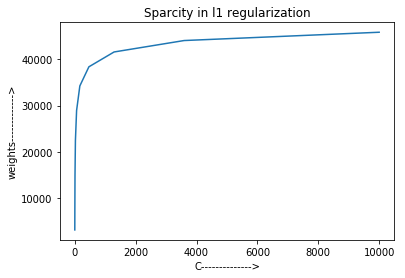

In [40]:
#plotting sparsity of l1 regularization using weights (vs) C
                                              ---------------      
plt.plot(C,weights1)
ymin, ymax = plt.ylim()
plt.xlabel('C-------------->')
plt.ylabel('weights------------->')
plt.title('Sparcity in L1 regularization')
plt.show()

From the above plot we can clearly see that L1 regularization  creates sparsity
---------


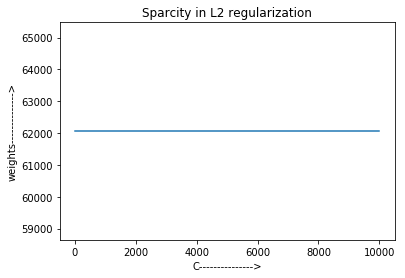

In [46]:
plt.plot(C,weights)
ymin, ymax = plt.ylim()
plt.xlabel('C--------------->')
plt.ylabel('weights-------------->')
plt.title('Sparcity in L2 regularization')
plt.show()

Checking Multicollinearity
-----------

In [36]:
tfidf_train.shape

(273098, 62063)

In [47]:
from sklearn.linear_model import LogisticRegression
import seaborn as ssb
noise = np.random.normal(loc=0.2,scale=0.1,size=10000)#Creating random noise
noise = noise.reshape(10000,1)
noise_counts = tfidf_train[0:10000] + noise#adding noise to traindata(10000 points)
m1 = LogisticRegression(C=2.7,penalty='l2')#fitting model with optimal hyperparameters for traindata
m1.fit(tfidf_train[0:10000],y_train[0:10000])
m2 = LogisticRegression(C=2.7,penalty='l2')
m2.fit(noise_counts,y_train[0:10000])#fitting model with optimal hyperparameters for noise added data
weights = np.array(m1.coef_)#obtaining coefficients of modeled traindata features
weight_noise = np.array(m2.coef_)#obtaining coefficients of modeled (noise+traindata )features
final_weight = np.subtract(weights,weight_noise)


/home/chandhana520/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


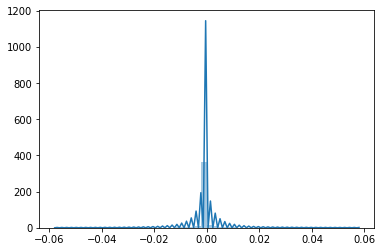

In [59]:
ssb.distplot(final_weight,label='PERTUBATION FOR CHECKING MULTICOLLINEARITY')
plt.show()


**since the weights did not differ much i.e almost all the values are 0 we can use these features for modeling**
---------

Modelling using optimal hyperparameters obtained by GRID-SEARCH
==========

Accuracy on training set 93.64294136170899 %
Accuracy on test set:  92.5521514176178 %
confusion matrix for test data


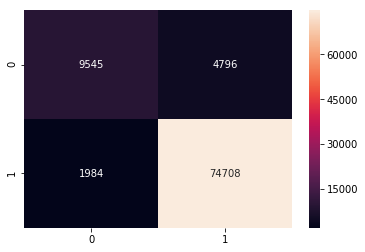

In [50]:
model = LogisticRegression(C=2.7,penalty='l2')
model.fit(tfidf_train,y_train)
pred = model.predict(tfidf_train)
acc_train = accuracy_score(y_train,pred)
print('Accuracy on training set',acc_train*100,'%')
#obtaining trainingset accuracy

predict = model.predict(tfidf_test)
acc_test = accuracy_score(y_test,predict)
confusion = confusion_matrix(y_test,predict)
#obtaining testset accuracy
print('Accuracy on test set: ',acc_test*100,"%")
print('confusion matrix for test data')
Q= ssb.heatmap(confusion, annot=True, fmt="d")
#printing confusion matrix for visualization



Modelling using optimal hyperparameters obtained by RANDOMIZED-SEARCH
=======


Accuracy on training set 94.22588228401526 %
Accuracy on test set:  92.52029483813561 %
confusion matrix for test data


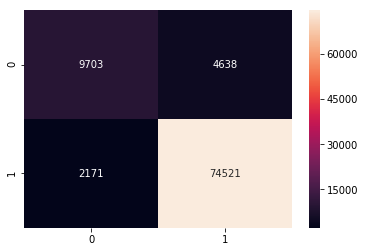

In [62]:
model = LogisticRegression(C=7.7,penalty='l2')
model.fit(tfidf_train,y_train)
pred = model.predict(tfidf_train)
acc_train = accuracy_score(y_train,pred)
print('Accuracy on training set',acc_train*100,'%')
#obtaining trainingset accuracy

predict = model.predict(tfidf_test)
acc_test = accuracy_score(y_test,predict)
confusion = confusion_matrix(y_test,predict)
#obtaining testset accuracy
print('Accuracy on test set: ',acc_test*100,"%")
print('confusion matrix for test data')
Q= ssb.heatmap(confusion, annot=True, fmt="d")
#printing confusion matrix for visualization



In [61]:
feat = tfidf_vect.get_feature_names()
feat = np.array(feat)
features = np.vstack((feat,np.absolute(model.coef_)))
features= pd.DataFrame(data=features.T,columns=('words','coefficients'))
top_feat= features.sort_values('coefficients',axis=0,inplace=False,ascending=False,kind='quicksort')
print('<=======>  Top 10 words<=======> ')
print(top_feat[0:10])

<=======>  Top 10 words<=======> 
            words           coefficients
3125         ashy  9.993292623282772e-05
16566    dwscribe  9.952742774882282e-05
39055      overpo   9.93693490951796e-05
15251  disappoint       9.92824715922875
14872      diatet  9.909617983225983e-05
4170    barbecuas  9.899783298224324e-05
25059       heniz  9.899783298224324e-05
44543   recimmend  9.886826846074295e-05
16299       drudg  9.772513205085405e-05
55895     tresemm  9.690362121250458e-05


CONCLUSION
======


1.  Using tfidf featurization  to get text vectors

2.  Obtaining optimal parameters using hyperparameter tuning using grid search and random search .

3.  Obtaining best penality (L1,L2) 
2.  Observing sparcity in  L1 and L2 regularization.

5.   Checking collinearity in features using pertubation technique,since featues are  not collinear we can use these features for modeling .
2. Obtaining  various performance measures of the model.
5. Grid search optimal parameters are C=2.7 and PENALITY=l2,Random search optimal parameters are C=7.7 and PENALITY=l2

7.     Accuracy on training set is 93.64 and on test set is  92.55 when grid search is used for tuning hyperparameters,and 94.22 , 92.52 when random search is used

9.    Obtaining top most important features .

  





